In [3]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [152]:

# Each matlab file saves data in an object 'o', which has the following fields:
#     id: A unique alphanumeric identifier of the record
#     nS: Number of EEG data samples
#     sampFreq: Sampling frequency of the EEG data
#     marker: The eGUI [interaction record of the recording session]
#             0 --> Nothing displayed
#             1 --> Left hand
#             2 --> Right hand
#             3 --> Passive / neutral
#     data: The Raw [EEG data of the recording session]

# Returns DF with EEG data for each channe, as well as column for marker
def load_patient(file_path, keep_channels):
    raw = loadmat(file_path)['o']
    # Make sure sampFreq = 200
    # 200 hz --> period of 0.005 seconds
    assert(raw['sampFreq'][0][0][0][0] == 200)
    marker = pd.Series(raw['marker'][0][0].flatten())
    chnames = [elem[0][0] for elem in raw['chnames'][0][0]]
    data = raw['data'][0][0]
    df = pd.DataFrame(data, columns=chnames)
#     df['marker'] = pd.Series(marker)
    return df, marker

In [183]:
patA, marker = load_patient("../data/CLASubjectA1601083StLRHand.mat")
patA.shape

(671600, 22)

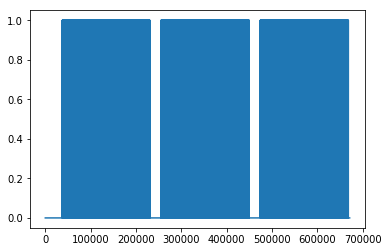

In [154]:
# See the three interaction segments
plt.plot((marker != 0).astype(int))

In [235]:
# Want to split up so that "trials" for each new task shown
# Format should be:
#     Array for each channel, label

# Want marker == 1 or 2 because these are our test conditions
m1_or_m2 = (marker == 2) | (marker == 1)
diffs = marker[(marker.diff(1) != 0) & m1_or_m2]

# Find Max Diff, and then zero pad end for those that are less
idx = pd.Series(diffs.index)
# Gets the difference between each element of index in diff (i.e. how long each 
# series is for specific interaction)
max_diff = int(idx.diff(1).median())
num_chans = 22
empty = np.zeros(shape=(num_chans, max_diff))
diffs = marker[marker.diff(1) != 0]

x = patA[37272:37282]


In [229]:
marker[(marker == 2) | (marker == 1)]

38370     1
38371     1
38372     1
38373     1
38374     1
38375     1
38376     1
38377     1
38378     1
38379     1
38380     1
38381     1
38382     1
38383     1
38384     1
38385     1
38386     1
38387     1
38388     1
38389     1
38390     1
38391     1
38392     1
38393     1
38394     1
38395     1
38396     1
38397     1
38398     1
38399     1
         ..
668110    2
668111    2
668112    2
668113    2
668114    2
668115    2
668116    2
668117    2
668118    2
668119    2
668120    2
668121    2
668122    2
668123    2
668124    2
668125    2
668126    2
668127    2
668128    2
668129    2
668130    2
668131    2
668132    2
668133    2
668134    2
668135    2
668136    2
668137    2
668138    2
668139    2
Length: 130692, dtype: uint8

Exception: Data must be 1-dimensional